# Chapter 03. 신경망
퍼셉트론은 이론상 복잡한 처리도 표현이 가능하다. 하지만 가중치를 수동으로 설정해야 하는 한계를 가지고 있다.

이런 퍼셉트론의 한계를 신경망에서는 가중치를 데이터로부터 자동으로 학습한다. 데이터로 부터 가중치를 자동으로 학습하는 것은 신경망의 중요한 성질이다. 

이번 장에서는 신경망이 입력 데이터가 무엇인지 식별하는 처리 과정을 자세히 알아본다.

## 3.1 퍼셉트론에서 신경망으로

### 3.1.1 신경망의 예
3층으로 구성된 신경망이라고 하면 0층은 입력층, 1층은 은닉층, 2층은 출력층. 

1층인 은닉층은 사람의 눈에 보이지 않는다.

### 3.1.2 Perceptron 복습

$y = 0 (b + w_1x_1 + w_2x_2 \leq 0)$

$y = 1 (b + w_1x_1 + w_2x_2 > 0) $

- b(bias, 편향): 뉴런이 얼마나 쉽게 활성화되는지 제어
- $w_1, w_2$ (weight, 가중치): 신호의 영향력 제어 

### 3.1.3 활성화 함수의 등장
- 활성화 함수(Activation function): 입력 신호의 총합을 출력 신호로 변환하는 함수

- $a = b + w_1x_1 + w_2x_2$
- $y = h(a)$ (h()는 활성함수)

* 단순 퍼셉트론: 단층 네트워크에서 계단 함수(step function)를 활성 함수로 사용한 모델
* 다층 퍼셉트론: 여러 층으로 구성, sigmoid function 등의 매끈한 활성화 함수 사용하는 네트워크

## 3.2 활성화 함수
활성화 함수는 임계값을 경계로 출력이 바뀐다. 이런 함수를 계단 함수(step function)이라 함, 퍼셉트론은 step function을 활성화 함수로 채용함

### 3.2.1 Sigmoid Function
- $h(x) = \frac{1}{1 + \exp^{-x}}$ 

신경망에서 활성화 함수로 sigmoid function 이용하여 신호 변환, 변환된 신호를 다음 뉴런에 전달

* 퍼셉트론과 신경망의 주된 차이: 활성화 함수

### 3.2.2 계단 함수 구현하기

In [70]:
# 아래의 step_function은 실수만 받아들일 수 있다. 벡터나를 입력으로 받기 위해서는 numpy를 사용하여 구현해 보자
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [71]:
import numpy as np

# 배열(벡터)를 지원
def step_function(x):
    y = x > 0
    return y.astype(np.int)  # 배열의 타입을 변환할때, astype()을 사용

### 3.2.3 계단 함수의 그래프

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=np.int)

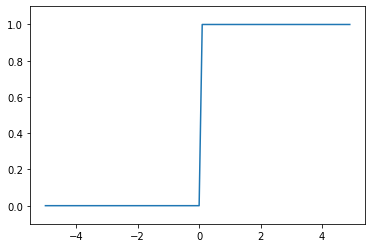

In [73]:
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)  # y축의 범위를 지정
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [74]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [75]:
# 확인
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

# 위 코드에서 numpy의 브로드캐스트 기능을 사용

array([0.26894142, 0.73105858, 0.88079708])

In [76]:
t =  np.array([1.0, 2.0, 3.0])
1.0 + t, 1.0 / t

(array([2., 3., 4.]), array([1.        , 0.5       , 0.33333333]))

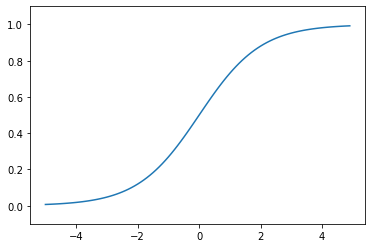

In [77]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.5 Sigmoid Function V.S Step Function

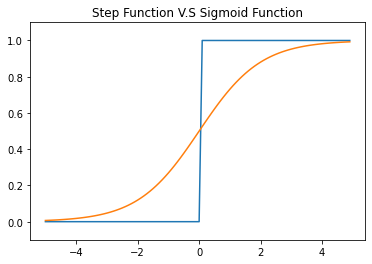

In [78]:
x1 = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x1)
x2 = np.arange(-5.0, 5.0, 0.1)
y2 = sigmoid(x2)

plt.plot(x1, y1, x2, y2)
plt.ylim(-0.1, 1.1)
plt.title("Step Function V.S Sigmoid Function")
plt.show()

**매끄러움**의 차이

- 시그모이드 함수: 부드러운 곡선, 입력에 따라 출력이 연속적으로 변해
- 계단 함수: 0을 경계로 출력 갑자기 변해

결국, 퍼셉트론은 계단 함수를 활성 함수로 사용해 뉴런 사이에 **0 or 1**이 흐른다.

신경망은 활성 함수로 시그모이드 함수를 사용하여 뉴런 사이에 연속적인 실수가 흐른다.

하지만 둘다 입력값이 중요하면 큰 값이, 입력값이 중요하지 않다면 작은 값을 출력하고 두 값들 모두 0 ~ 1의 범위를 갖는다.

### 3.2.6 비선형 함수
계단 함수와 시그모이드 함수 모두 **비선형 함수**이다.

cf) 선형 함수는 1개의 직선으로 그릴 수 있는 함수($y = ax + b$의 형태를 갖는다.), 비선형 함수는 직선 1개로는 그릴 수 없는 함수

**신경망에서 비선형 함수를 활성화 함수로 채용해야 하는 이유?**
$\Rightarrow$ 신경망에서 선형 함수를 사용하면 은닉층이 없는 네트워크를 사용하는 것과 같다. 즉, 층을 쌓아 여러 층을 구성하는 이점을 살리지 못하기 때문

### 3.2.7 ReLU 함수
최근에 활성화 함수로 **ReLU(Rectified Linear Unit)** 함수를 주로 이용

ReLU: 입력이 0을 넘으면 입력값 그대로 출력, 0 이하라면 0을 출력하는 함수

In [79]:
def relu(x):
    return np.maximum (0, x)

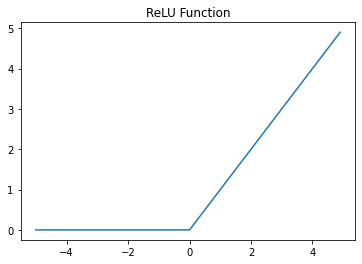

In [80]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.title("ReLU Function")
plt.show()

위의 함수는 아래와 같은 수식으로 표현 가능

$h(x) = 0 (x \leq 0)$

$h(x) = x (x > 0)$

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열
다차원 배열: '숫자의 집합', 한줄, 직삭각형, 3차원으로 늘어놓은 것.

In [81]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [82]:
# 2차원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print(B.shape)  # 2차원 배열 = Matrix

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 행렬의 곱

In [83]:
# np.dot(A, B), np.dot(B, A)의 결과는 다를수 있다는 것에 유의
# 행렬의 곱이 되기 위해서는 앞 행렬의 열의 수와 뒷 행렬의 행의 수가 일치해야 한다.
A = np.array([[1,2], [3,4]])
print(A.shape)

B = np.array([[5,6], [7,8]])
print(B.shape)

print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


### 3.3.3 신경망에서의 행렬 곱

In [84]:
# 아래의 신경망은 편향과 활성화 함수를 생략하고 가중치만 갖는다.
X = np.array([1, 2])
print(X)
print(X.shape)
W = np.array([[1,3,5], [2,4,6]])
print(W)
print(W.shape)

Y = np.dot(X, W)
print(Y)

[1 2]
(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명
$w_{12}^{(1)}$: 앞층의 두번째 뉴런에서 다음층의 첫번째 뉴런으로 가는 가중치
- 오른쪽 아래 12 $\rightarrow$ 1: 다음층의 뉴런의 인덱스, 2: 앞층의 뉴런의 인덱스
- (1): 1층의 가중치

### 3.4.2 각 층의 신호 전달 구현하기

In [85]:
# 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])  # 입력층
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 1층의 가중치
B1 = np.array([0.1, 0.2, 0.3])  # 1층의 편향

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [86]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [87]:
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [88]:
# 1층에서 2층으로 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 배열에서 열의 개수는 다음층 뉴런의 개수, 행의 개수는 앞층의 뉴런의 개수
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [89]:
# 2층에서 출력층으로 신호 전달
# 출력층의 활성화 함수로 Identity_function(): 항등함수, 입력을 그대로 출력하는 함수를 사용
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)

[0.31682708 0.69627909]


출력층의 활성화 함수는 **풀고자 하는 문제의 성질에 맞게 정의**
- 회귀 $\rightarrow$ 항등 함수
- 2클래스 분류 $\rightarrow$ 시그모이드 함수
- 다중 클래스 분류 $\rightarrow$ 소프트맥스 함수

를 사용하는 것이 일반적

### 3.4.3 구현 정리

In [90]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기
신경망은 **분류**와 **회귀** 모두에 이용 가능
 
둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.

- 회귀 $\rightarrow$ 항등 함수
- 분류 $\rightarrow$ 시그모이드 함수(2클래스 분류), 소프트 맥스(다중 클래스 분류)

cf)

기계학습 문제는 **분류(Classification)**와 **회귀(Regression)** 로 나뉜다. 
- 분류: 데이터가 어느 클래스에 속하는가 하는 문제
    - 사진 속 인물의 성별을 분류하는 문제 
- 회귀: 입력 데이터에서 (연속적) 수치를 예측하는 문제
    - 사진 속 인물의 몸무게를 예측하는 문제
    
Softmax Function: Multi-class classification에서 확률의 합이 1을 초과 시, 확률의 값을 0 ~ 1사이로 만들어주는 함수

### 3.5.1 항등 함수와 Softmax function 함수 구현하기
- 항등 함수(Identitiy Function): 입력을 그대로 출력하는 함수
- 소프트맥스 함수(Softmax Function): $y_k = \frac{\exp{a_k}}{\sum_{i=1}^{n}\exp{a_i}}$
    - n: 출력층의 뉴런 수
    - $y_k$: 출력층의 n개의 뉴런 중 k번째 출력

In [91]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점
컴퓨터로 계산시 **오버플로 문제** 발생
개선 수식 $\rightarrow$ $y_k = \frac{\exp{a_k}}{\sum_{i=1}^{n}\exp{a_i}}$ = $\frac{C\exp{a_k}}{C\sum_{i=1}^{n}\exp{a_i}}$ = $\frac{\exp{(a_k + \log{C})}}{\sum_{i=1}^{n}\exp{(a_i + \log{C})}}$ = $\frac{\exp{(a_k + C`)}}{\sum_{i=1}^{n}\exp{(a_i + C`)}}$

지수 함수 계산시 어떤 **정수를 더하거나 빼도** 결과 변하지 않는다. $\rightarrow$ 오버플로 방지를 위해 C\`에 입력 신호 중 최대값 이용 

In [92]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # 오버플로(NaN)문제 발생

<ipython-input-92-81d166e72ac2>:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))  # 오버플로(NaN)문제 발생
<ipython-input-92-81d166e72ac2>:2: RuntimeWarning: invalid value encountered in true_divide
  np.exp(a) / np.sum(np.exp(a))  # 오버플로(NaN)문제 발생


array([nan, nan, nan])

In [93]:
# Overflow 문제 해결을 위해 가장 큰 값을 뽑고 뺄셈을 수행해도 소프트맥스 함수의 성질에 의해 가장 큰 값의 뉴런의 위치는 변하지 않는다.
c = np.max(a)
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

### 3.5.3 소프트맥스 함수의 특징
- softmax function의 특징: **출력의 총합 = 1**

"출력의 총합이 1"인 성질으로 출력을 **확률**로 해석 가능

In [94]:
# 0번째 class 1.8%, 1번째 class 24.5%, 2번째 class 74% 확률을 가진다.
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


**Softmax Function**을 이용하면 문제를 **확률적(통계적)** 대응 가능

신경망 분류서 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식, Softmax Function **단조 증가** 함수라 대소 관계는 변하지 않는다. $\Rightarrow$ 가장 큰 출력 내는 뉴런의 위치는 불변

결과적으로 신경망 분류 시, 출력층의 softmax function은 생략 $\rightarrow$ 지수 함수 계산 자원 낭비 방지 (현업에서는 출력층에서 생략)

### 3.5.4 출력층의 뉴런 수 정하기
출력층의 뉴런의 수는 문제에 맞게 설정, 일반적으로 **분류하고 싶은 class 수** 로 설정

e.g)
입력 image 0 ~ 9 $\rightarrow$ 뉴런 10개 설정

## 3.6 손글씨 숫자 인식
3.6 손글씨 숫자 인식에서는 이미 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현 할 것.
이 추론 과정을 **순전파(forward propagation)** 이라 한다.

cf) 신경망도 기계학습과 같이 두 단계에 거쳐 문제 해결, 먼저 training data 사용하여 가중치 매개변수를 학습하고 학습된 매개변수를 사용해 입력 데이터를 분류

### 3.6.1 MNIST 데이터셋
MNIST는 손글씨 숫자 이미지 집합

In [95]:
import numpy as np
import pandas as pd
import sys, os
sys.path.append(os.pardir)  # 부모 디렉토리의 파일을 가져올 수 있도록 설정 
from dataset.mnist import load_mnist

In [96]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [97]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [98]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(img)
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


In [110]:
# neuralnet_mnist.py
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=False, flatten=True, normalize=True)
    return x_test, t_test

def init_network():
    with open("./dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    
    return network

def predict(network, x):
    W1, W2, W3 = network["W1"], network["W2"], network["W3"]
    b1, b2, b3 = network["b1"], network["b2"], network["b3"]
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

init_network() 에서는 pickle 파일인 sample_weight.pkl에 저장된 '학습된 가중치 매개변수'를 읽는다. 이 파일에는 가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.

In [111]:
# 위 3개의 함수를 이용, 추론과 정확도(Accuracy) 평가

x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuarcy:" + str(float(accuracy_cnt) / len(x)))

Accuarcy:0.9352


normalize 인수를 True로 설정하여 0 ~ 255 범위인 image pixel의 값을 0.0 ~ 1.0 범위로 변환하였다.

데이터를 특정한 범위로 변환하는 처리를 **정규화(Normalize)** 라 하고, 신경망의 입력 데이터에 특정 변환을 가하는 것을 **전처리(pre-processing)** 라 한다. 여기서는 입력 이미지 데이터에 대한 전처리 작업으로 정규화를 수행

현업에서도 신경망에 전처리를 활발하게 사용한다. 전처리를 통해 식별 능력 개선하고 학습 속도를 높이는 등 사례가 많다. 여기서는 단순 정규화를 수행했지만, 현업에서는 **데이터 전체의 분포를 고려해 전처리**하는 경우가 많다. 예를 들어 데이터 전체 평균과 표준편차를 이용, 데이터들이 0을 중심으로 분포하도록 이동하거나 데이터의 확산 범위를 제한하는 정규화를 수행한다. 그 외에 데이터를 균일하게 분포시키는 데이터 **백색화(Whitening)** 등도 있다.

### 3.6.3 배치 처리

입력 데이터와 가중치 매개변수의 '형상'에 주의하여 위의 구현을 살펴보자

In [113]:
X, _ = get_data()
network = init_network()
W1, W2, W3 = network["W1"], network["W2"], network["W3"]

In [114]:
print(X.shape)
print(X[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


#### 배치 처리 구현

In [115]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = X[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(X)))

Accuracy:0.9352


- range(start, stop, step) : start ~ end - 1까지 step 간격으로 증가하는 리시트 반환
    - X[i:i+batch_size]: i번째부터 i+batch_size까지 데이터를 묶음 $\rightarrow$ x[0:100], x[100,200] ...

In [116]:
print(list(range(0,10)))
print(list(range(0, 10, 3)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 3, 6, 9]


- argmax(): 최댓값의 인덱스를 가져옴

In [120]:
X = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(X, axis=1)
print(y)

[1 2 1 0]


- == 연산자 사용,boolean array 만들고 결과에서 True가 몇개인지 센다.

In [121]:
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

print(y == t)
print(np.sum(y == t))

[ True  True False  True]
3


## 정리
- 신경망에서 활성화 함수로 sigmoid function, ReLU 함수 같은 매끄럽게 변화하는 함수 이용 
- Numpy의 다차원 배열을 사용하면 신경망을 효울적으로 구현 가능
- **기계학습** 문제는 크게 **회귀**와 **분류**로 나눌 수 있다.
- 출력층의 활성화 함수는 회귀에서는 주로 항등함수(Identity function), 분류에서는 주로 Softmax function을 이용
- 입력 데이터를 묶은 것을 **배치**라 하고, 추론 처리를 이 배치 단위로 진행하면 결과를 빠르게 얻을 수 있다.